# Air Quality Index

## ML model to be used

- Linear Regression
- Lasso Regression
- Ridge Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor*
- ANN- Artificial Neural Network


## XGBRegressor for training the data

In [22]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Reading the dataframe
data_frame=pd.read_csv('AQI_data.csv')

In [25]:
data_frame.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [26]:
x=data_frame.iloc[:,:-1]#independent features
y=data_frame.iloc[:,-1]#dependent feature

## Spliting the data

In [27]:
#spliting the data by dividing into 70% for training data and 30% for test data

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

- x_train and y_train are used for training the model.
- x_test and y_test are used for test the model.

In [29]:
#initializing the model

In [30]:
model=XGBRegressor()

In [31]:
#fitting the model with data

In [32]:
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
#testing the data with test data
model.score(x_test,y_test)

0.8123312908288712

In [34]:
#testing the data with train data
model.score(x_train,y_train)

0.9997717196345083

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
#cross validation for test data
score=cross_val_score(model,x_test,y_test,cv=5)
score.mean()

0.5458603448304723

In [37]:
#cross validation for train data
score=cross_val_score(model,x_train,y_train,cv=5)
score.mean()

0.7785279495874976

## Evaluating the model

In [38]:
#chekcing the predictions

In [39]:
predictions=model.predict(x_test)

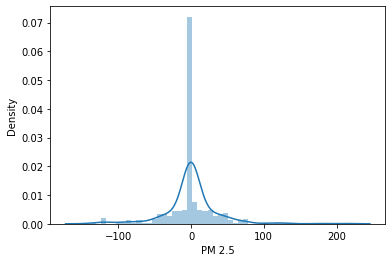

In [40]:
sns.distplot(predictions-y_test);

Text(0.5, 1.0, 'Relation between the y_test and predicted values')

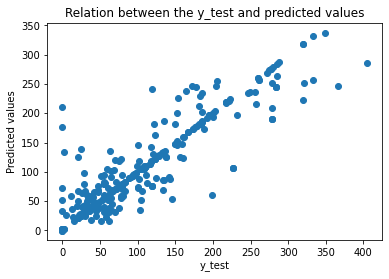

In [41]:
plt.scatter(y_test,predictions);
plt.xlabel('y_test');
plt.ylabel('Predicted values');
plt.title('Relation between the y_test and predicted values')

## Evaluating the model using the most common evaluation metrics from scratch

- MAE:- Mean Absolute Error
- MSE:- Mean Squared Error
- RSME:- Root Mean Squared Error

In [45]:
#python module for metrics
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  19.580280922483503
MSE:  1344.4213595167196
RMSE:  36.66635187084638


## Hyperparameter tuning

## Using RandomSearchCV to tune the model

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [47]:
param_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [49]:
#initialize the base model
regressor=XGBRegressor()

In [54]:
#search across 100 combinations
#cv=5
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 100,cv=5,verbose=10)

In [55]:
xg_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.1, score=-1393.754, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.1, score=-1150.811, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.1, score=-1351.895, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.1, score=-1304.915, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=100, min_child_weight=3, max_depth=25, learning_rate=0.1, score=-1778.375, total=   0.3s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-1628.834, total=   0.5s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-1435.511, total=   0.5s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.2s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-1918.602, total=   0.4s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.6s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-1707.769, total=   0.5s
[CV] subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.1s remaining:    0.0s


[CV]  subsample=0.8, n_estimators=1000, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-1960.932, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=0.3, score=-1601.292, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=0.3, score=-1335.083, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=0.3, score=-1849.396, total=   0.4s
[CV] subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=3, max_depth=15, learning_rate=0.3, score=-1435.001, total=   0.5s
[CV] subsample=0.7, n

[CV]  subsample=0.6, n_estimators=600, min_child_weight=3, max_depth=5, learning_rate=0.5, score=-1916.430, total=   0.2s
[CV] subsample=0.6, n_estimators=600, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.6, n_estimators=600, min_child_weight=3, max_depth=5, learning_rate=0.5, score=-2480.042, total=   0.3s
[CV] subsample=0.8, n_estimators=400, min_child_weight=5, max_depth=10, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=400, min_child_weight=5, max_depth=10, learning_rate=0.6, score=-2032.212, total=   0.2s
[CV] subsample=0.8, n_estimators=400, min_child_weight=5, max_depth=10, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=400, min_child_weight=5, max_depth=10, learning_rate=0.6, score=-1535.133, total=   0.2s
[CV] subsample=0.8, n_estimators=400, min_child_weight=5, max_depth=10, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=400, min_child_weight=5, max_depth=10, learning_rate=0.6, score=-1921.626, total=   0.2s
[CV] subsample=0.8, n_es

[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.5, score=-1414.405, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=6, max_depth=10, learning_rate=0.5, score=-1812.818, total=   0.2s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.05, score=-1464.068, total=   1.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.05, score=-1145.176, total=   1.1s
[CV] subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=15, learning_rate=0.05, score=-1539.761, total=   0.9s
[CV] subsample=

[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-1910.336, total=   1.1s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-1453.864, total=   1.7s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=5, max_depth=30, learning_rate=0.2, score=-1843.617, total=   1.3s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=3, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=1200, min_child_weight=3, max_depth=20, learning_rate=0.1, score=-1397.460, total=   1.4s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=3, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=1200, min_child_weight=3, max_depth=20, learning_rate=0.1, score=-1140.717, total=   1.3s
[CV] subsamp

[CV]  subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-1579.892, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-1798.132, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-1433.717, total=   0.6s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=5, learning_rate=0.3, score=-1878.422, total=   0.5s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.05 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=7, max_depth=25, learning_rate=0.05, score=-1540.006, total=   1.3s
[CV] subsample=0.

[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.1, score=-1416.985, total=   1.3s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.1, score=-1225.465, total=   1.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.1, score=-1500.754, total=   1.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.1, score=-1492.209, total=   1.1s
[CV] subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=5, max_depth=20, learning_rate=0.1, score=-1838.210, total=   1.3s
[CV] subsample=0.6, n

[CV]  subsample=0.8, n_estimators=700, min_child_weight=6, max_depth=10, learning_rate=0.1, score=-1855.597, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=20, learning_rate=0.1, score=-1540.174, total=   0.8s
[CV] subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=20, learning_rate=0.1, score=-1381.244, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=20, learning_rate=0.1, score=-1626.031, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=20, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=700, min_child_weight=6, max_depth=20, learning_rate=0.1, score=-1384.204, total=   1.5s
[CV] subsample=0.7, n

[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=30, learning_rate=0.05, score=-1402.490, total=   1.2s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=30, learning_rate=0.05, score=-1982.711, total=   1.5s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=15, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=15, learning_rate=0.5, score=-2028.790, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=15, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=15, learning_rate=0.5, score=-1812.082, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=15, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=800, min_child_weight=7, max_depth=15, learning_rate=0.5, score=-1716.552, total=   0.4s
[CV] subsample=

[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1, score=-1521.180, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1, score=-1401.579, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=3, max_depth=15, learning_rate=0.1, score=-1841.221, total=   0.5s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.05, score=-1438.894, total=   0.8s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=7, max_depth=10, learning_rate=0.05, score=-1306.653, total=   0.9s
[CV] subsampl

[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=25, learning_rate=0.6, score=-1906.057, total=   0.3s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=25, learning_rate=0.6, score=-1543.728, total=   0.4s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=25, learning_rate=0.6, score=-1866.551, total=   0.4s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=25, learning_rate=0.6, score=-1829.752, total=   0.4s
[CV] subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.6, n_estimators=1200, min_child_weight=3, max_depth=25, learning_rate=0.6, score=-2979.021, total=   0.4s
[CV] subsamp

[CV]  subsample=0.7, n_estimators=800, min_child_weight=5, max_depth=25, learning_rate=0.1, score=-1791.043, total=   1.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=4, max_depth=5, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=4, max_depth=5, learning_rate=0.6, score=-1616.972, total=   0.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=4, max_depth=5, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=4, max_depth=5, learning_rate=0.6, score=-1616.464, total=   0.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=4, max_depth=5, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=4, max_depth=5, learning_rate=0.6, score=-2508.980, total=   0.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=4, max_depth=5, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=4, max_depth=5, learning_rate=0.6, score=-1834.217, total=   0.3s
[CV] subsample=0.7, n

[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, score=-1581.818, total=   1.2s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.3, score=-2219.835, total=   0.9s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=0.5, score=-1789.606, total=   0.7s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=0.5, score=-1562.291, total=   1.2s
[CV] subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=1200, min_child_weight=7, max_depth=25, learning_rate=0.5, score=-2151.678, total=   0.8s
[CV] subsample=

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-1745.514, total=   0.6s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-1412.133, total=   0.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=5, max_depth=5, learning_rate=0.2, score=-1768.517, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=15, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=15, learning_rate=0.5, score=-1853.740, total=   0.4s
[CV] subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=15, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=800, min_child_weight=4, max_depth=15, learning_rate=0.5, score=-1917.094, total=   0.4s
[CV] subsample=0.7, n

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [57]:
#getting best params
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1200,
 'min_child_weight': 3,
 'max_depth': 20,
 'learning_rate': '0.1'}

In [59]:
#getting best score
xg_random.best_score_

-1393.9842455702553

In [60]:
## Evaluating the model

In [61]:
predictions=xg_random.predict(x_test)

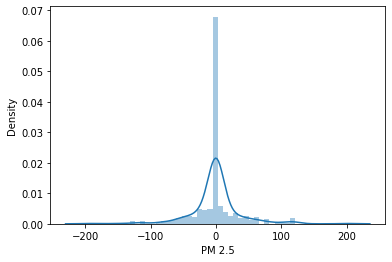

In [64]:
sns.distplot(y_test-predictions);

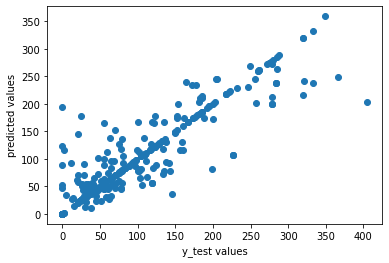

In [66]:
plt.scatter(y_test,predictions);
plt.xlabel('y_test values');
plt.ylabel('predicted values');

In [67]:
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  19.35244346095794
MSE:  1408.4210778057964
RMSE:  37.52893653976617


In [68]:
import pickle
with open('xgboostRegressor_model.pkl','wb') as file:
    pickle.dump(xg_random,file)